<a href="https://colab.research.google.com/github/Nithiyasree11/sentiment-analysis---nlp-project/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'Review'],on_bad_lines='skip'  )
df=pd.DataFrame(data)

<ipython-input-5-190f3370256d>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'Review'],on_bad_lines='skip'  )


In [ ]:
nltk.download('vader_lexicon')
s=SentimentIntensityAnalyzer()
df['scores']=df['Review'].astype(str).apply(lambda x:s.polarity_scores(x)['compound'])
df['sentiment']=df['scores'].apply(lambda score:'positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


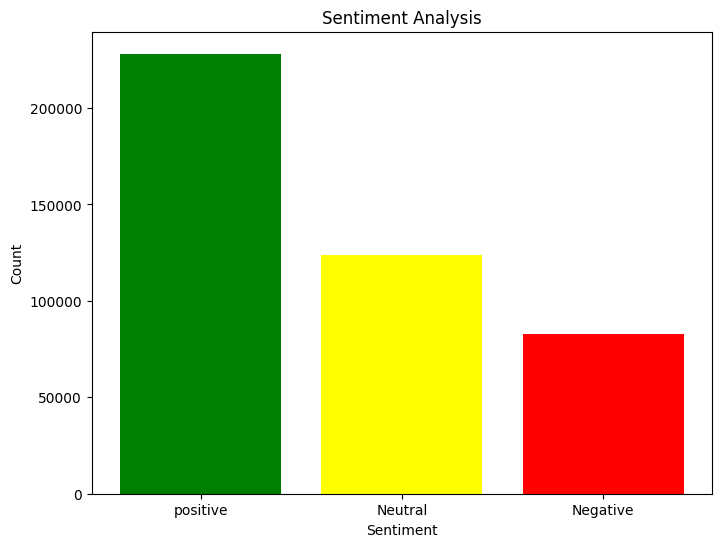

In [ ]:
senti_count=df['sentiment'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(senti_count.index,senti_count.values, color=['green','yellow','red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
def analyze_new_review(review):
    score = s.polarity_scores(review)['compound']
    sentiment = "Positive" if score > 0.05 else ("Negative" if score < -0.05 else "Neutral")
    return sentiment, score

# Example: Ask user for a new review
new_review = input("Enter a review: ")
sentiment, score = analyze_new_review(new_review)

print(f"\nReview: {new_review}")
print(f"Sentiment Score: {score}")
print(f"Sentiment: {sentiment}")


Enter a review: it is good to have a nice day

Review: it is good to have a nice day
Sentiment Score: 0.6908
Sentiment: Positive
